# Divide the dataset in training and testing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")
a = np.random.randn(len(data))

(array([ 4.,  7., 19., 17., 35., 47., 38., 18., 10.,  5.]),
 array([-2.88819156, -2.3537196 , -1.81924764, -1.28477568, -0.75030372,
        -0.21583177,  0.31864019,  0.85311215,  1.38758411,  1.92205606,
         2.45652802]),
 <BarContainer object of 10 artists>)

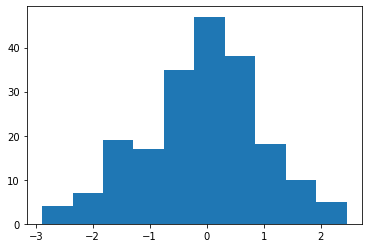

In [6]:
plt.hist(a)

In [7]:
check = (a<0.8)

In [8]:
training = data[check]
testing = data[~check]
len(training), len(testing)


(160, 40)

In [9]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     815.8
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.13e-83
Time:                        15:50:55   Log-Likelihood:                -294.25
No. Observations:                 160   AIC:                             594.5
Df Residuals:                     157   BIC:                             603.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9751      0.307      9.695      0.000       2.369       3.581
TV             0.0444      0.001     30.665      0.000       0.042       0.047
Radio          0.1982      0.008     24.343      0.000       0.182       0.214
==============================================================================
Omnibus:                       22.512   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.438
Skew:                          -0.912   Prob(JB):                     1.10e-06
Kurtosis:                       3.889   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sales_pred = lm.predict(testing) #aplicando el modelo
# The RSS is used to measure how well the line fits the data.

In [14]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

194.77898469970376

In [15]:
RSE = np.sqrt(SSD/(len(testing)-2-10))
RSE

2.637497357478052

In [16]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.20751356077718738

### scikit-learn

In [18]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
Y = data["Sales"]
estimator = SVR(kernel="linear") #Crea el model
selector = RFE(estimator, n_features_to_select=2, step=1) #Recursive Feature Elimination
selector = selector.fit(X, Y)
selector.support_


array([ True,  True, False])

In [19]:
from sklearn.linear_model import LinearRegression
X_pred = X[["TV", "Radio"]]
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [20]:
lm.intercept_

2.9210999124051362

In [22]:
lm.coef_

array([0.04575482, 0.18799423])

In [23]:
lm.score(X_pred, Y)

0.8971942610828957